In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

sns.set()

In [2]:
# load data

data = pd.read_csv('Canadian Tire Case Dataset.csv')
data.head()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,Urbanity,is_referral,channel,offer,conversion,Unnamed: 10,Example on reading data
0,1,10,142.44,1,0,Surburban,0,store,Buy One Get One,0,NaN,"Customer 1 last shopped 10 months ago, and has..."
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0,NaN,NaN
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0,NaN,NaN
3,4,9,675.83,1,0,Rural,1,Web,Discount,0,NaN,NaN
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0,NaN,NaN


In [3]:
#trimming off errelevant data columns
data = data.iloc[:,:10]
data.head()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,Urbanity,is_referral,channel,offer,conversion
0,1,10,142.44,1,0,Surburban,0,store,Buy One Get One,0
1,2,6,329.08,1,1,Rural,1,Web,No Offer,0
2,3,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,4,9,675.83,1,0,Rural,1,Web,Discount,0
4,5,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [4]:
#checking for duplicate entries
data['CustomerID'].duplicated().sum()

0

In [5]:
# checking for any missing data in data set
data.isnull().sum()

CustomerID                       0
recency                          0
historical customer spend        0
has_used_discount_in_the_past    0
has_used_bogo_in_the_past        0
Urbanity                         0
is_referral                      0
channel                          0
offer                            0
conversion                       0
dtype: int64

In [6]:
data.dtypes

CustomerID                         int64
recency                            int64
historical customer spend        float64
has_used_discount_in_the_past      int64
has_used_bogo_in_the_past          int64
Urbanity                          object
is_referral                        int64
channel                           object
offer                             object
conversion                         int64
dtype: object

### Understanding the Data

In [7]:
data.describe()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,32000.500000,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,18475.352951,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,16000.750000,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,32000.500000,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,48000.250000,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,64000.000000,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [8]:
data['channel'].unique()

array(['store', 'Web', 'Multichannel'], dtype=object)

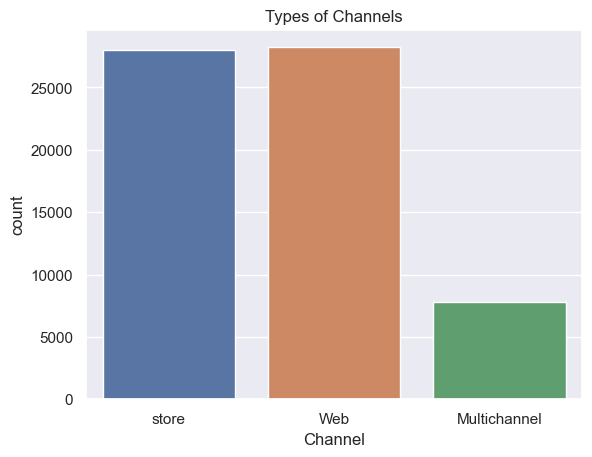

In [75]:
channels = sns.countplot(data=data, x='channel').set(title='Types of Channels', xlabel='Channel')

In [11]:
data['Urbanity'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

[Text(0.5, 1.0, 'Types of Urbanity')]

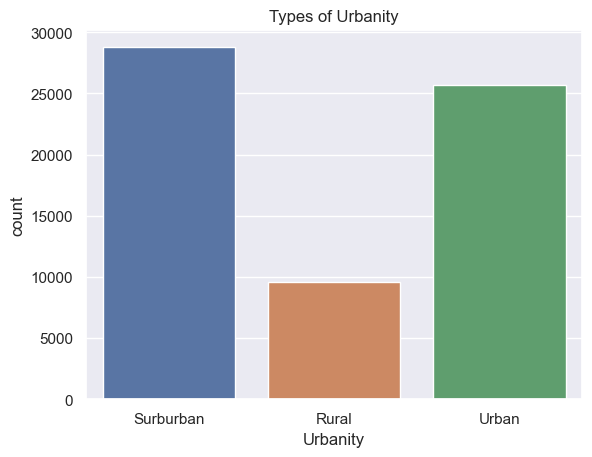

In [76]:
sns.countplot(data=data, x='Urbanity').set(title='Types of Urbanity')

In [13]:
data['offer'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

[Text(0.5, 1.0, 'Types of Offers')]

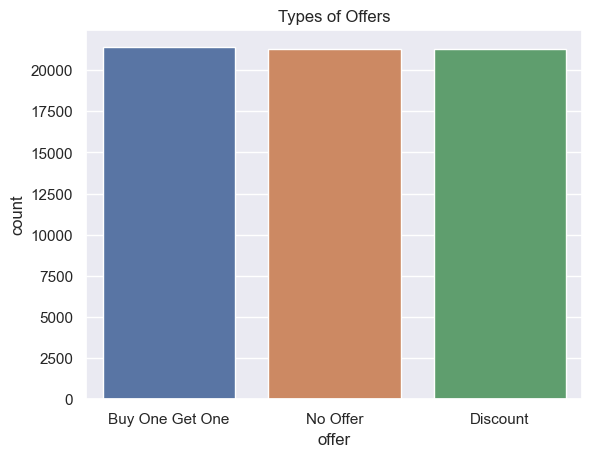

In [77]:
sns.countplot(data=data, x='offer').set(title='Types of Offers')

[Text(0.5, 1.0, 'Types of Offers')]

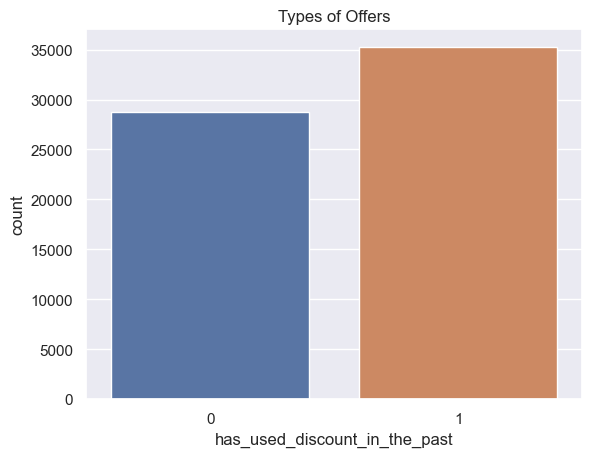

In [89]:
sns.countplot(data=data, x='has_used_discount_in_the_past').set(title='Types of Offers')

<AxesSubplot:xlabel='has_used_bogo_in_the_past', ylabel='count'>

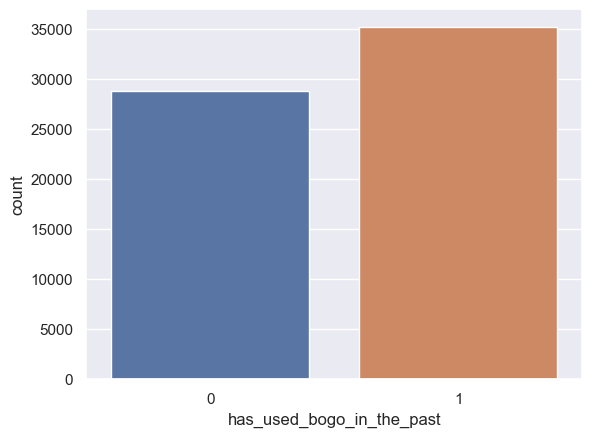

In [90]:
sns.countplot(data=data, x='has_used_bogo_in_the_past')

<AxesSubplot:xlabel='has_used_bogo_in_the_past', ylabel='count'>

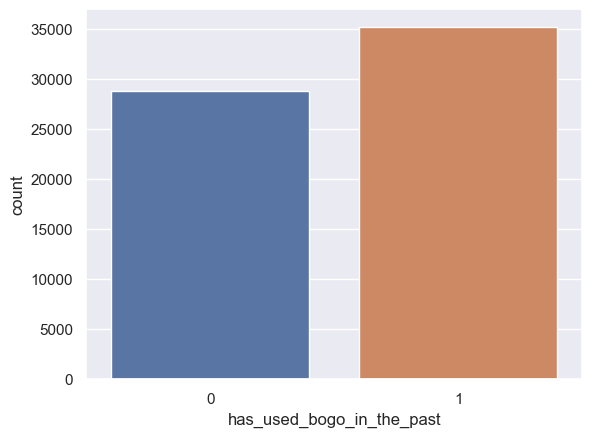

In [83]:
sns.countplot(data=data, x='has_used_bogo_in_the_past')

[Text(0.5, 0, 'Months since last Purchase'),
 Text(0.5, 1.0, 'Months Since Last Purchase')]

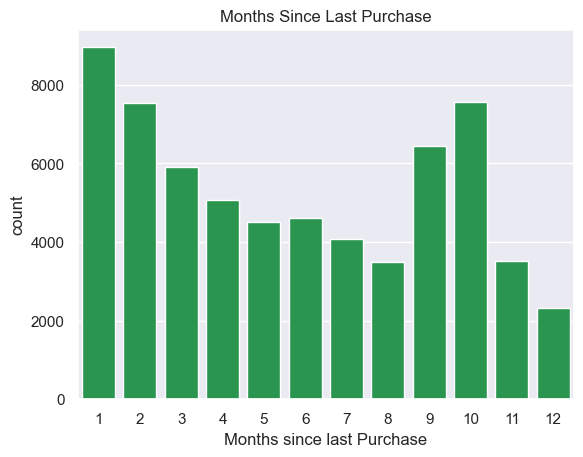

In [103]:
sns.countplot(data=data, x='recency', color='#17A74A').set(xlabel='Months since last Purchase', title='Months Since Last Purchase')

C:\Users\asaqu\anaconda3\envs\causalml-py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Historical Customer Spending ($)'),
 Text(0.5, 1.0, 'Historical Customer Spending')]

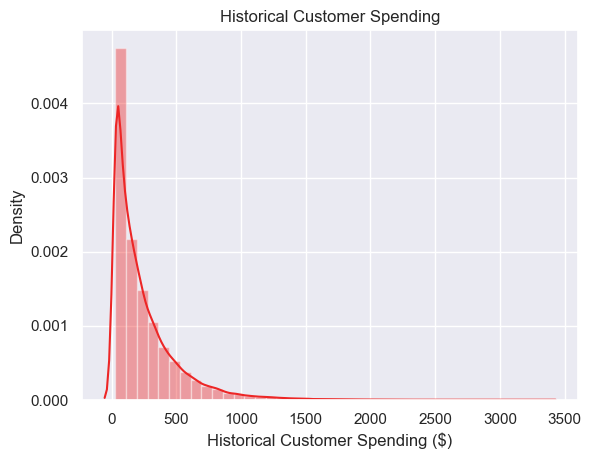

In [104]:
sns.distplot(x=data['historical customer spend'], bins=40, color='#ED2626').set(xlabel='Historical Customer Spending ($)', title='Historical Customer Spending')

<AxesSubplot:xlabel='conversion', ylabel='offer'>

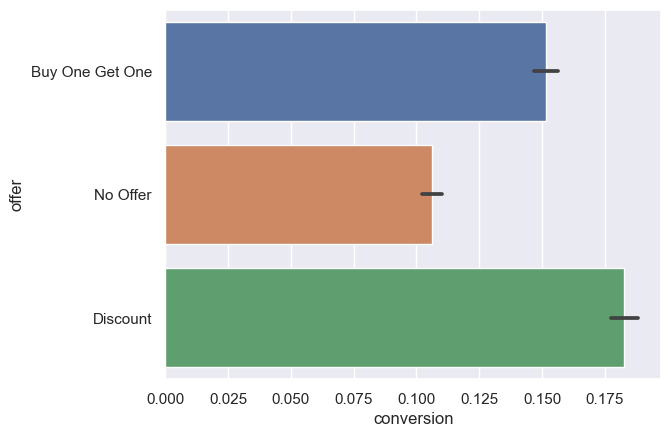

In [16]:
sns.barplot(data=data, x='conversion', y='offer')
#should look at what percentage of conversions was there a offer

In [17]:
data_only_conversions = pd.DataFrame()

for i in range(len(data)):
    if data.loc[i,'conversion'] == 1:
        data_only_conversions = pd.concat([data_only_conversions,data.iloc[[i]]])
        
data_only_conversions.head()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,Urbanity,is_referral,channel,offer,conversion
5,6,6,134.83,0,1,Surburban,0,store,Buy One Get One,1
10,11,7,548.91,0,1,Urban,1,store,Buy One Get One,1
13,14,2,101.64,0,1,Urban,0,Web,Discount,1
15,16,3,58.13,1,0,Urban,1,Web,No Offer,1
22,23,2,118.40,1,0,Surburban,0,Web,Discount,1


In [96]:
data_only_conversions.describe()

,CustomerID,recency,historical customer spend,has_used_discount_in_the_past,has_used_bogo_in_the_past,is_referral,conversion
count,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.000000,9394.0
mean,31967.198637,5.131467,282.323739,0.559080,0.612093,0.413136,1.0
std,18420.399555,3.481646,280.674183,0.496524,0.487299,0.492423,0.0
min,6.000000,1.000000,29.990000,0.000000,0.000000,0.000000,1.0
25%,16100.750000,2.000000,80.565000,0.000000,0.000000,0.000000,1.0
50%,32065.500000,4.000000,202.460000,1.000000,1.000000,0.000000,1.0
75%,47908.250000,8.000000,384.632500,1.000000,1.000000,1.000000,1.0
max,63990.000000,12.000000,3215.970000,1.000000,1.000000,1.000000,1.0


In [18]:
data_only_conversions['conversion'].sum()

9394

[Text(0.5, 1.0, 'Count of types of Offers')]

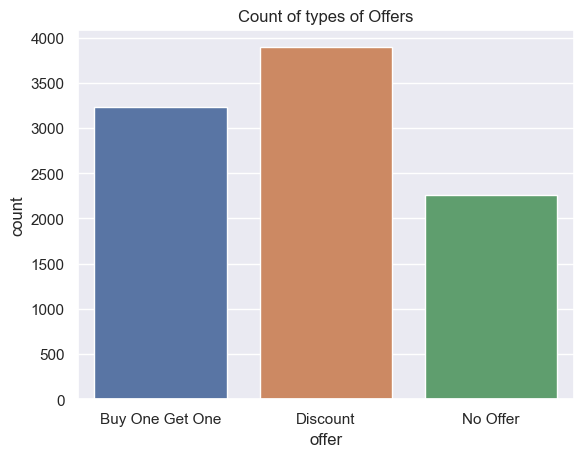

In [19]:
sns.countplot(x=data_only_conversions['offer']).set(title='Count of types of Offers')

C:\Users\asaqu\anaconda3\envs\causalml-py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Historical Customer Spending ($)'),
 Text(0.5, 1.0, 'Historical Customer Spending')]

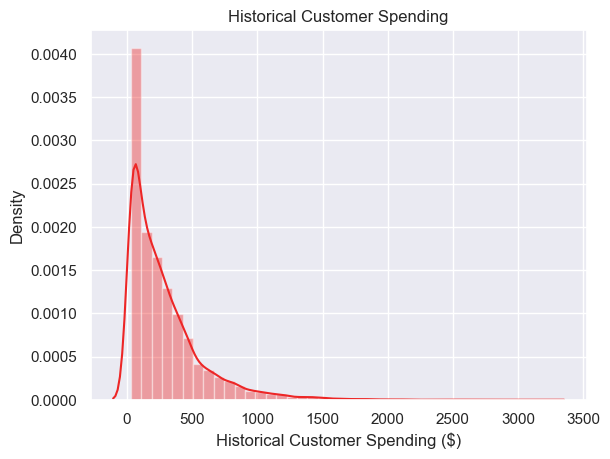

In [98]:
sns.distplot(x=data_only_conversions['historical customer spend'], bins=40, color='#ED2626').set(xlabel='Historical Customer Spending ($)', title='Historical Customer Spending')

<AxesSubplot:xlabel='historical customer spend'>

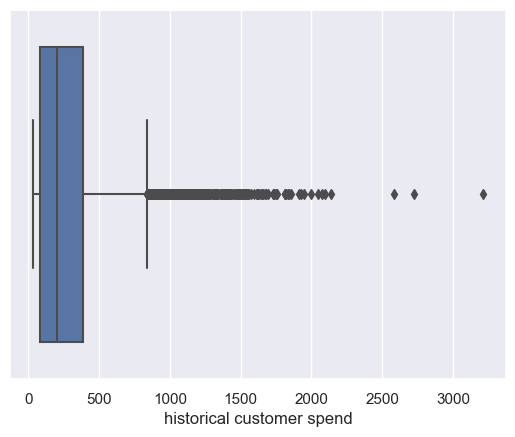

In [40]:
sns.boxplot(x=data_only_conversions['historical customer spend'])

In [41]:
data_only_conversions['historical customer spend'].median()

202.45999999999998

C:\Users\asaqu\anaconda3\envs\causalml-py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Months Since Last Purchase'),
 Text(0.5, 1.0, 'Months Since last Purchase')]

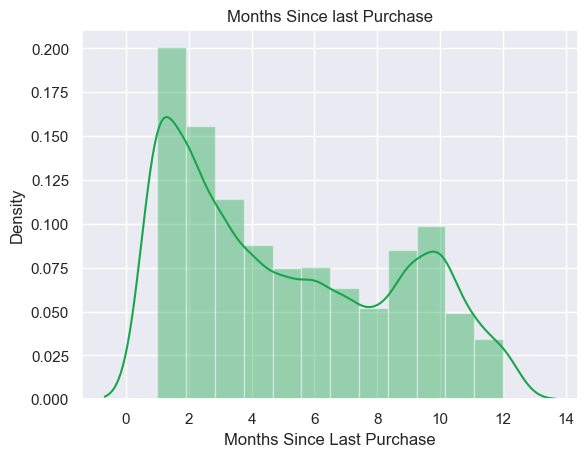

In [99]:
sns.distplot(x=data_only_conversions['recency'], bins=12, color='#17A74A').set(xlabel='Months Since Last Purchase', title='Months Since last Purchase')

In [24]:
conv_no_offer = 0
no_conv_no_offer = 0 
conv_disc = 0
no_conv_disc = 0
conv_bogo = 0
no_conv_bogo = 0

for i in range(len(data)):
    if data.loc[i,'conversion'] == 1:
        
        if data.loc[i,'offer'] == 'Buy One Get One':
            conv_bogo += 1
        
        elif data.loc[i,'offer'] == 'Discount':
            conv_disc += 1
            
        elif data.loc[i,'offer'] == 'No Offer':
            conv_no_offer += 1
            
    elif data.loc[i, 'conversion'] == 0:
        
        if data.loc[i,'offer'] == 'Buy One Get One':
            no_conv_bogo += 1
        
        elif data.loc[i,'offer'] == 'Discount':
            no_conv_disc += 1
            
        elif data.loc[i,'offer'] == 'No Offer':
            no_conv_no_offer += 1
        
        


In [39]:
print(conv_no_offer + no_conv_no_offer + conv_disc + no_conv_disc +conv_bogo + 
      no_conv_bogo)

64000


In [92]:
#calculate conversion percent
bogo_conv_percent = (conv_bogo/(no_conv_bogo + conv_bogo))*100
disc_conv_percent = (conv_disc/(no_conv_disc + conv_disc))*100
no_promo_conv_percent = (conv_no_offer/(no_conv_no_offer + conv_no_offer))*100

bogo_diff = bogo_conv_percent - no_promo_conv_percent
disc_diff = disc_conv_percent - no_promo_conv_percent
no_promo_diff = 0

In [93]:
table = {'Promotion': ['Bogo', 'Discount', 'No Promotion'],
        'Conversions': [conv_bogo, conv_disc, conv_no_offer],
         'Non-conversions': [no_conv_bogo, no_conv_disc, no_conv_no_offer],
        'Conversion Percent': [bogo_conv_percent, disc_conv_percent, no_promo_conv_percent],
        'Increase in conversion compared to no promotion': [bogo_diff, disc_diff, no_promo_diff]}


df = pd.DataFrame(data=table)
df

,Promotion,Conversions,Non-conversions,Conversion Percent,Increase in conversion compared to no promotion
0,Bogo,3238,18149,15.140038,4.523311
1,Discount,3894,17413,18.275684,7.658956
2,No Promotion,2262,19044,10.616728,0.000000


<AxesSubplot:>

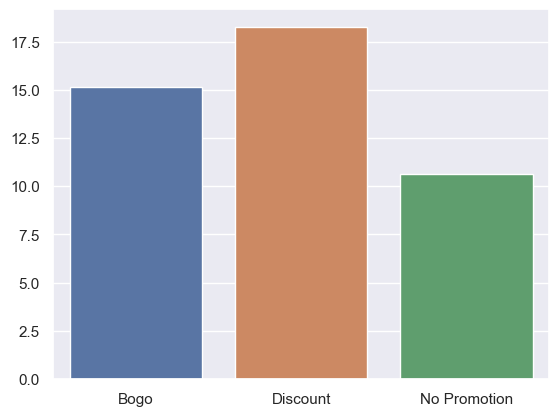

In [94]:
Promotion = ['Bogo', 'Discount', 'No Promotion']
Conversion_percent = [bogo_conv_percent, disc_conv_percent, no_promo_conv_percent]

sns.barplot(x=Promotion, y=Conversion_percent)
